In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [4]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [5]:
from PIML.box.boxWR import BoxWR

In [9]:
b = BoxWR()

INFO:root:#536 R=1000.00
INFO:root:instrument Res = 2300,  dotSqrt of 4.35
INFO:root:snr2nl-SN: [378.74052126452364, 126.28867884957, 94.7321985477008, 75.79831036657929, 37.93053400433624, 18.996645823214713, 12.68534976284087, 9.52970173265395, 7.636312914541797]
INFO:root:nlList: [385.097 194.701 141.885]
INFO:root:Top #536 eigs [230.41 119.49  25.02  14.81  11.56   8.31   6.8    4.94   4.25   3.1 ]


sky_H (5368,)
(5368,) 0
Building RBF with gaussan kernel on data shape (2880,)
Building RBF with gaussan kernel on data shape (2880, 536)


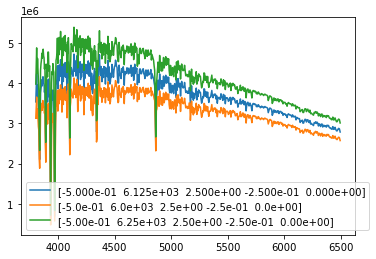

In [10]:
W="Blue"; R="R"; Res=5000;step=10;
b.init(W,R, Res,step, onPCA=1, topk=10)

In [11]:
from PIML.nn.dnn.dnnWR import dnnWR

INFO:root:PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [12]:
d = dnnWR(b)

In [13]:
d.init_train(mtype="NzDNN", name="", save=0, trainNL=None, nTrain=16384)

In [14]:
d.train(lr=0.01, dp=0.02, batch=512, nEpoch=300, verbose=0)

Layers: [10, 128, 64, 32, 16, 3]


2022-02-11 12:50:28.062029: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-11 12:50:28.803950: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14640 MB memory:  -> device: 0, name: NVIDIA Tesla V100-SXM2-16GB, pci bus id: 0000:62:00.0, compute capability: 7.0
INFO:root:None
INFO:root:Prepareing #16384 NL=385.0966184172893 trainset
INFO:root:| EP 300 |loss: 0.0133 | mean_: 0.0133 | val_l: 0.0107 | val_m: 0.0107 | lr: 0.0000 | 
INFO:root:timing 233.9 sec


In [15]:
d.test(nTest=100,testNL =None)

100%|██████████| 10/10 [00:01<00:00,  9.98it/s]


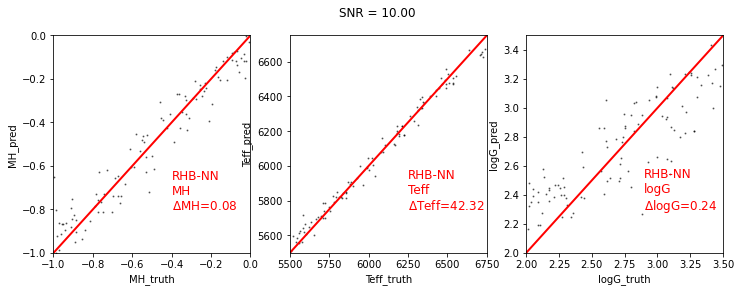

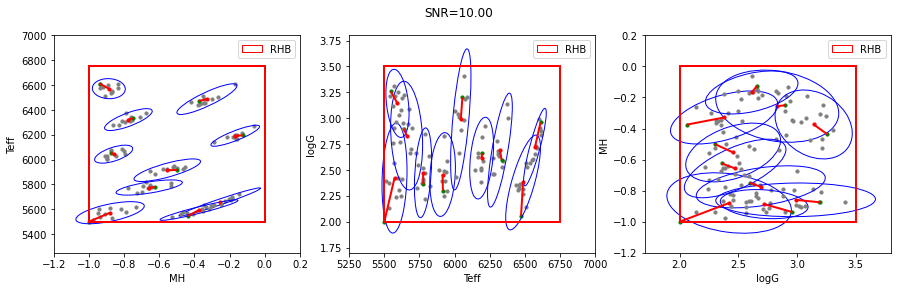

In [16]:
d.init_eval()